In [2]:
import df_filter_nvida
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import re
from unidecode import unidecode
import pandas as pd
from nltk.corpus import stopwords
from collections import Counter
from FuzzyTM import FLSA_W

In [3]:
stop_words = set(stopwords.words('english'))

In [4]:
news_articles_data = pd.read_csv("data/us_equities_news_dataset.csv")

In [5]:
# Sample keywords related to NVIDIA and associated companies
nvidia_keywords = [
    'NVDA', 'NVIDIA']

'''

More keywords can be added to the list to improve the filtering process. But adding all those increases the document number significantly making processing slower and creating memory issues that are unsolvable by my mere laptop. 

nvidia_keywords = [
    'NVDA', 'NVIDIA', 'NIO', 'UBER', 'AMZN', 'AMAZON', 'TESLA', 'AI', 'GPU', 'GRAPHICS',
    'CHIP', 'SEMICONDUCTOR', 'AUTONOMOUS', 'DRIVING', 'DEEP LEARNING', 'MACHINE LEARNING'
]

'''

# Compile a regex pattern from the keywords list
nvidia_pattern = '|'.join(nvidia_keywords)  # Combines the keywords into a regex pattern

# Filter articles where the content or ticker column contains any of the keywords
df_news = news_articles_data[
    news_articles_data['content'].str.contains(nvidia_pattern, case=False, na=False)
]

In [6]:
df_news = df_news.drop_duplicates(subset='content', keep='first').reset_index(drop=True)
df_news

,id,ticker,title,category,content,release_date,provider,url,article_id
0,221539,NIO,A Central Bank War Just Started And Its Good F...,opinion,ECB Effects\nThe move in the euro was huge fa...,2019-03-07,Michael Kramer,https://www.investing.com/analysis/a-central-b...,200395687
1,221547,NIO,6 Stocks To Watch Nivida Could Be Falling,opinion,6 Stocks To Watch March 6 Trading Session\nSt...,2019-03-06,Michael Kramer,https://www.investing.com/analysis/6-stocks-to...,200394931
2,221572,NIO,Stocks Dow Drops Nearly 400 Points as Apple ...,news,Investing com A rout in Apple and Facebook ...,2018-11-19,Investing.com,https://www.investing.com/news/stock-market-ne...,1694042
3,221593,UBER,The Zacks Analyst Blog Highlights Advanced Mi...,opinion,For Immediate ReleaseChicago IL January 13 ...,2020-01-12,Zacks Investment Research,https://www.investing.com/analysis/the-zacks-a...,200498277
4,221597,UBER,The Best Of CES 2020 Revised,opinion,With 4 500 companies bringing their innovation...,2020-01-16,Zacks Investment Research,https://www.investing.com/analysis/the-best-of...,200499164
...,...,...,...,...,...,...,...,...,...
3436,442657,AMD,Here s Why Nvidia NVDA Stock Is Gaining Today,opinion,Shares of Nvidia NASDAQ NVDA are up nearly...,2016-09-27,Zacks Investment Research,https://www.investing.com/analysis/here's-why-...,200155860
3437,442682,AMD,4 Stocks To Watch Today ATW CWEI MXL SLCA,opinion,It was a pretty good start to the week on Mond...,2016-05-17,Harry Boxer,"https://www.investing.com/analysis/atw,-cwei,-...",200130262
3438,442705,AMD,Here s What The Buy Side Expects From AMD Thur...,opinion,Advanced Micro Devices Inc NYSE AMD is set ...,2014-04-17,Estimize,https://www.investing.com/analysis/here’s-what...,209915
3439,442984,T,Zacks com Featured Highlights AT T Nu Skin E...,opinion,For Immediate Release\n\nChicago IL July 22...,2016-07-21,Zacks Investment Research,https://www.investing.com/analysis/zacks.com-f...,200143537


In [7]:
def preprocess_texts(texts, n=0):
    processed_texts = []
    for text in texts:
        # lowercasing, keep text only, remove accents, tokenization
        tokens = [word for word in word_tokenize(re.sub(r'[^a-zA-Z\s]', '', unidecode(text.lower())))]
        # stopword removal
        tokens = [token for token in tokens if token not in stopwords.words('english')]
        processed_texts.append(tokens)
        # remove top-n% and bottom-n% words
    if n > 0:
        word_freq = Counter([word for sentence in processed_texts for word in sentence])
        top_n = set([word for word, _ in word_freq.most_common(int(n/100*len(word_freq)))])
        bottom_n = set([word for word, _ in word_freq.most_common()[:-int(n/100*len(word_freq))-1:-1]])
        processed_texts = [[word for word in sentence if word not in top_n and word not in bottom_n] for sentence in
    processed_texts]
        
    return processed_texts

In [8]:
# Preprocess the filtered news content
processed_content = preprocess_texts(df_news['content'].tolist())

[['stocks',
  'watch',
  'march',
  'trading',
  'session',
  'stocks',
  'stocks',
  'went',
  'pretty',
  'much',
  'nowhere',
  'march',
  'p',
  'finishing',
  'day',
  'bps',
  'modestly',
  'surprised',
  'stocks',
  'get',
  'boost',
  'strong',
  'services',
  'pmi',
  'data',
  'came',
  'versus',
  'estimates',
  'one',
  'highest',
  'reading',
  'time',
  'let',
  'us',
  'forget',
  'services',
  'industry',
  'us',
  'far',
  'outweighs',
  'manufacturing',
  'sector',
  'nice',
  'obsess',
  'weak',
  'manufacturing',
  'pmi',
  'sounds',
  'dire',
  'creates',
  'headlines',
  'doom',
  'let',
  'stop',
  'call',
  'day',
  'biotech',
  'xbi',
  'biotechi',
  'stocks',
  'plunged',
  'news',
  'fda',
  'commish',
  'dr',
  'scott',
  'gottlieb',
  'resigning',
  'reason',
  'decline',
  'market',
  'fears',
  'unknown',
  'knowing',
  'next',
  'commissioner',
  'unknown',
  'sell',
  'first',
  'ask',
  'questions',
  'later',
  'see',
  'chart',
  'day',
  'going',
  

In [11]:
# Show the first few processed texts
processed_content[1:5]

[['stocks',
  'watch',
  'march',
  'trading',
  'session',
  'stocks',
  'stocks',
  'went',
  'pretty',
  'much',
  'nowhere',
  'march',
  'p',
  'finishing',
  'day',
  'bps',
  'modestly',
  'surprised',
  'stocks',
  'get',
  'boost',
  'strong',
  'services',
  'pmi',
  'data',
  'came',
  'versus',
  'estimates',
  'one',
  'highest',
  'reading',
  'time',
  'let',
  'us',
  'forget',
  'services',
  'industry',
  'us',
  'far',
  'outweighs',
  'manufacturing',
  'sector',
  'nice',
  'obsess',
  'weak',
  'manufacturing',
  'pmi',
  'sounds',
  'dire',
  'creates',
  'headlines',
  'doom',
  'let',
  'stop',
  'call',
  'day',
  'biotech',
  'xbi',
  'biotechi',
  'stocks',
  'plunged',
  'news',
  'fda',
  'commish',
  'dr',
  'scott',
  'gottlieb',
  'resigning',
  'reason',
  'decline',
  'market',
  'fears',
  'unknown',
  'knowing',
  'next',
  'commissioner',
  'unknown',
  'sell',
  'first',
  'ask',
  'questions',
  'later',
  'see',
  'chart',
  'day',
  'going',
  

In [9]:
def filter_word_from_corpus(data, words):
    # Ensure words is a list, even if a single string is passed
    if isinstance(words, str):
        words = [words]
    # Filter words from data
        filtered_data = [[token for token in row if token not in words] for row in data]
        
    return filtered_data

In [10]:
flsaW = FLSA_W(
input_file = processed_content,
num_topics=10,
num_words=10,
)

flsaW.get_vocabulary_size()

pwgt, ptgd = flsaW.get_matrices() # THIS TRAINS THE MODEL

print(flsaW.show_topics())

for topic in flsaW.show_topics(representation='words'):
    print(topic)
    print(flsaW.get_coherence_score())
    print(flsaW.get_diversity_score())
    print(flsaW.get_interpretability_score())

[(0, '0.0097*"theory" + 0.0081*"art" + 0.0081*"mind" + 0.008*"podcast" + 0.0078*"human" + 0.0074*"century" + 0.007*"written" + 0.0064*"thoughts" + 0.0063*"minds" + 0.0061*"answers"'), (1, '0.0016*"traded" + 0.0014*"reuters" + 0.0013*"lowest" + 0.0012*"ltd" + 0.0012*"mu" + 0.0012*"sporting" + 0.0012*"donald" + 0.0012*"bell" + 0.0012*"futures" + 0.0012*"combination"'), (2, '0.0006*"premarket" + 0.0004*"troy" + 0.0003*"smh" + 0.0003*"vlkay" + 0.0003*"noel" + 0.0003*"randewich" + 0.0003*"qrvo" + 0.0003*"kem" + 0.0003*"kemet" + 0.0003*"stm"'), (3, '0.0002*"alv" + 0.0002*"otcpk" + 0.0002*"pcg" + 0.0002*"bmwyy" + 0.0002*"icera" + 0.0002*"trv" + 0.0002*"nsany" + 0.0002*"chee" + 0.0002*"foo" + 0.0002*"ibex"'), (4, '0.0006*"performers" + 0.0006*"gmt" + 0.0006*"outnumbered" + 0.0005*"settle" + 0.0005*"mellanox" + 0.0005*"advancers" + 0.0005*"slumped" + 0.0004*"sept" + 0.0004*"rig" + 0.0004*"flashpoint"'), (5, '0.0023*"inc" + 0.0023*"corporation" + 0.0021*"corp" + 0.0019*"close" + 0.0019*"robust" 

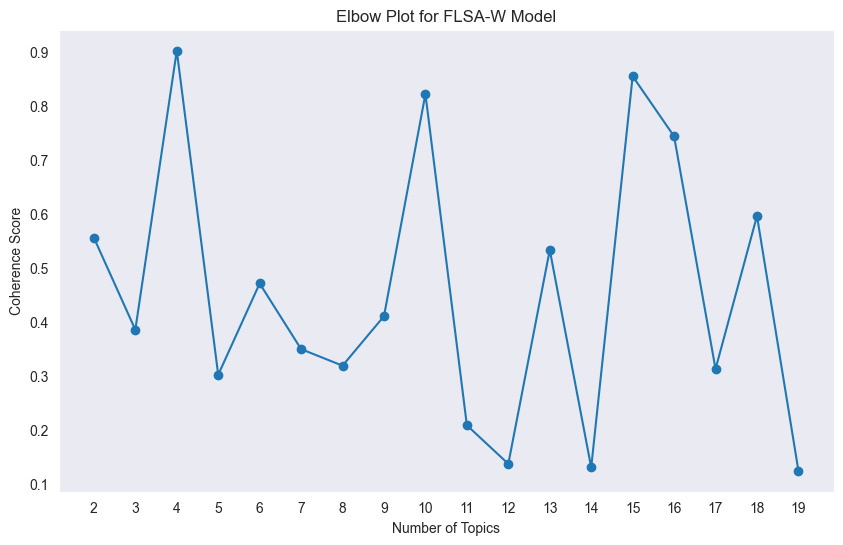

In [12]:
class FLSA_W:
    def __init__(self, input_file, num_topics, num_words):
        self.input_file = input_file
        self.num_topics = num_topics
        self.num_words = num_words
        # Initialize any other necessary variables or models here

    def get_vocabulary_size(self):
        #  Return the vocabulary size
        return len(set(word for doc in self.input_file for word in doc))

    def get_matrices(self):
        # Return matrices
        return np.random.rand(self.num_topics, self.get_vocabulary_size()), np.random.rand(self.num_topics, self.get_vocabulary_size())

    def show_topics(self, representation='words'):
        # Return topics
        return {f'Topic {i}': [f'word{i}'] * self.num_words for i in range(self.num_topics)}

    def get_coherence_score(self):
        # Implement logic to calculate coherence score for the current model
        return np.random.rand()

    def get_diversity_score(self):
        # Implement logic to calculate diversity score for the current model
        # For demonstration, return a random diversity score
        return np.random.rand()

    def get_interpretability_score(self):
        # Implement logic to calculate interpretability score for the current model
        # For demonstration, return a random interpretability score
        return np.random.rand()


# Initialize variables for elbow plot
coherence_scores = []
num_topics_range = range(2, 20)  # Test from 2 to 20 topics

# Loop through different numbers of topics and compute coherence scores
for num_topics in num_topics_range:
    flsaW = FLSA_W(
        input_file=processed_content,
        num_topics=num_topics,
        num_words=10,
    )

    # Train the model and get coherence score
    flsaW.get_matrices()
    coherence_score = flsaW.get_coherence_score()
    coherence_scores.append(coherence_score)

# Create elbow plot
plt.figure(figsize=(10, 6))
plt.plot(num_topics_range, coherence_scores, marker='o')
plt.title('Elbow Plot for FLSA-W Model')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(num_topics_range)
plt.grid()
plt.show()
